In [32]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [33]:
# Group driver count by city
grouped_city = city_ride.groupby(["city"])
city_fare = grouped_city["fare"].mean()
city_rides = grouped_city["ride_id"].count()
sum_fare = grouped_city["fare"].sum()

# Create a new DataFrame for correct count of drivers per city
by_city = pd.DataFrame({"Rides": city_rides,
                        "Average Fare": city_fare,})
by_city = pd.merge(by_city, cleaned_data, on="city", how="inner")
by_city = by_city.drop(labels="city", axis=1)
by_city = by_city.drop(labels="fare", axis=1)
by_city = by_city.drop(labels="ride_id", axis=1)
by_city = by_city.drop_duplicates(subset=['Average Fare',
                                          'type'])
by_city = by_city.reset_index(drop=True)
by_city.head()

,Rides,Average Fare,driver_count,type
0,18,24.641667,12,Urban
1,22,25.332273,26,Urban
2,16,36.422500,11,Suburban
3,18,32.956111,22,Suburban
4,10,40.064000,7,Rural


## Bubble Plot of Ride Sharing Data

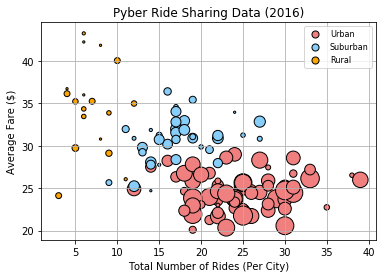

In [34]:
# Create a list from above table
urban_data = by_city.loc[by_city["type"] == "Urban", :]
suburban_data = by_city.loc[by_city["type"] == "Suburban", :]
rural_data = by_city.loc[by_city["type"] == "Rural", :]

# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# 1. Urban city type
urban_x = urban_data["Rides"]
urban_y = urban_data["Average Fare"]
urban_size = urban_data["driver_count"]*5 

urban = plt.scatter(urban_x, urban_y, s=urban_size, color="lightcoral", edgecolor="black", alpha=None)

# 2. Suburban city type
suburban_x = suburban_data["Rides"]
suburban_y = suburban_data["Average Fare"]
suburban_size = suburban_data["driver_count"]*5 

suburban = plt.scatter(suburban_x, suburban_y, s=suburban_size, color="lightskyblue", edgecolor="black", alpha=None)

# 3. Rural city type
rural_x = rural_data["Rides"]
rural_y = rural_data["Average Fare"]
rural_size = rural_data["driver_count"]*5 

rural = plt.scatter(rural_x, rural_y, s=rural_size, color="orange", edgecolor="black", alpha=None)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plot = plt.legend((urban, suburban, rural),
           ('Urban', 'Suburban', 'Rural'),
          fontsize=8,
          markerscale=2)

plt.grid(True)

# Incorporate a text label regarding circle size
for handle in plot.legendHandles:
    handle.set_sizes([50])
    
# Save Figure
plt.savefig("Results\Pyber Ride Sharing Data (2016).png")

# Show Figure
plt.show()

## Total Fares by City Type

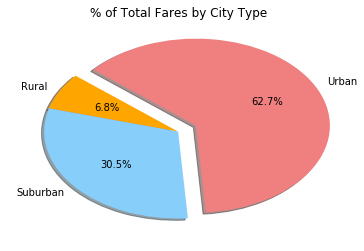

In [35]:
# Calculate Type Percents

grouped_type = city_ride.groupby(["type"])
type_fare = grouped_type["fare"].sum()
explode = [0, 0, 0.15]
labels = ["Rural", "Suburban", "Urban"]
colors = ["orange", "lightskyblue", "lightcoral"]

# Build Pie Chart
plt.pie(type_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Results\% of Total Fares by City Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

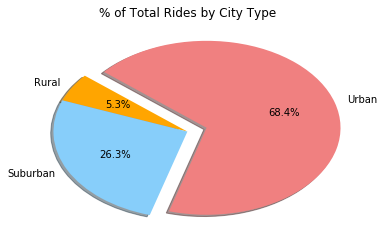

In [36]:
# Calculate Type Percents

grouped_ride = city_ride.groupby(["type"])
type_rides = grouped_type["ride_id"].count()
explode = [0, 0, 0.15]
labels = ["Rural", "Suburban", "Urban"]
colors = ["orange", "lightskyblue", "lightcoral"]

# Build Pie Chart
plt.pie(type_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Results\% of Total Rides by City Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

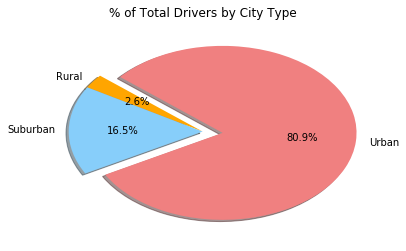

In [37]:
# Calculate Driver Percents

grouped_drivers = by_city.groupby(["type"])
type_drivers = grouped_drivers["driver_count"].sum()
explode = [0, 0, 0.15]
labels = ["Rural", "Suburban", "Urban"]
colors = ["orange", "lightskyblue", "lightcoral"]

# Build Pie Chart
plt.pie(type_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Results\% of Total Drivers by City Type.png")

# Show Figure
plt.show()